<a href="https://colab.research.google.com/github/matheusmf1/computer_vision_AI/blob/master/Aula7_Redes_Custumizada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#geradores de imagem

from keras.preprocessing.image import ImageDataGenerator

#gerador

imagem_gen = ImageDataGenerator(rotation_range = 20, 
                                width_shift_range = 0.1, 
                                height_shift_range = 0.1,
                                rescale = 1/255, 
                                shear_range = 0.2,
                                zoom_range = 0.2, 
                                horizontal_flip = True, 
                                fill_mode = 'nearest' )

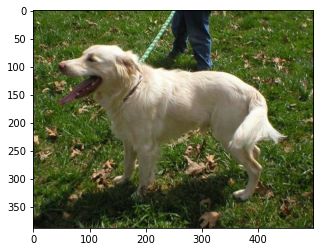

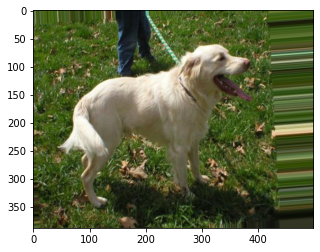

In [10]:
#Teste de imagem aleatória 

import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('/content/drive/My Drive/Colab Notebooks/Visão Computacional/CATS_DOGS/test/DOG/11784.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
new_img = imagem_gen.random_transform(img)

plt.figure()
plt.imshow(img)

plt.figure()
plt.imshow(new_img)

In [16]:
caminho_treino = '/content/drive/My Drive/Colab Notebooks/Visão Computacional/CATS_DOGS/train'
caminho_teste = '/content/drive/My Drive/Colab Notebooks/Visão Computacional/CATS_DOGS/test'

#Quantidade de imagens que serão geradas
BATCH_SIZE = 16

#Determina o tamanho das imagens
DIMENSOES_IMAGEM = (128,128)

In [17]:
#Criar os geradores das imagens
gerador_imagens_treino = imagem_gen.flow_from_directory(caminho_treino,
                                                        target_size = DIMENSOES_IMAGEM,
                                                        batch_size = BATCH_SIZE,
                                                        class_mode = "categorical")

gerador_imagens_teste = imagem_gen.flow_from_directory(caminho_teste,
                                                        target_size = DIMENSOES_IMAGEM,
                                                        batch_size = BATCH_SIZE,
                                                        class_mode = "categorical")

Found 5336 images belonging to 2 classes.
Found 3189 images belonging to 2 classes.


In [22]:
#Criar modelo

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

modelo = Sequential()

#Primeiro camada - Conv
modelo.add(Conv2D( filters=32, kernel_size=(4,4), input_shape=(128,128,3), activation='relu' ) )

#Pooling
modelo.add( MaxPool2D( pool_size=(2,2) ) )

#Conv
modelo.add( Conv2D(filters=32, kernel_size=(4,4), activation='relu') )

#Pooling
modelo.add( MaxPool2D(pool_size=(2,2)) )

#2d->1d
modelo.add( Flatten() )

#Camada Dense
modelo.add( Dense(128, activation='relu') )
modelo.add( Dropout(0.2) )

#Camada de saída
modelo.add( Dense(2, activation='softmax') )

#Compila o modelo
modelo.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

#Exibe o sumário do modelo
print(modelo.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 125, 125, 32)      1568      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 59, 59, 32)        16416     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 29, 29, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 26912)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               3444864   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

In [23]:
#Ignorar warnings
import warnings

warnings.filterwarnings('ignore')

In [24]:
#Fit do modelo

results = modelo.fit( gerador_imagens_treino, epochs = 1, steps_per_epoch = 150,
                     validation_data = gerador_imagens_teste, validation_steps = 12 )

150/150 [==============================] - 1191s 8s/step - loss: 0.6953 - accuracy: 0.5542 - val_loss: 0.6791 - val_accuracy: 0.5417


In [26]:
#Salva o modelo

modelo.save( 'pesos_rede_colab_gato_cachorro.h5' )

In [25]:
#Para classificar uma imagem

from keras.preprocessing import image

In [27]:
img = caminho_teste + '/DOG/11784.jpg'
img = image.load_img( img, target_size = DIMENSOES_IMAGEM )


In [28]:
import numpy as np

img = image.img_to_array( img )

img.shape

(128, 128, 3)

In [29]:
img = np.expand_dims( img, axis = 0 )
img.shape

(1, 128, 128, 3)

In [30]:
img = img/255

In [31]:
predicao = modelo.predict_classes(img)
print(predicao)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[1]
